## Sec. 36.2  - Ultimate Technologies Inc. Take-Home Challenge

</b>Biman Mondal</b>

</b>July 3rd, 2025</b>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator

In [2]:
# Reading from a local JSON file
logins_df = pd.read_json('./logins.json', convert_dates=True)
city_df = pd.read_json('./ultimate_data_challenge.json')

### Part 1 - Exploratory data analysis

</b>Use *logins.json* file of user logins in a particular geographics location.</b>
Aggregagte these login counts on 15 minute time interval. 
Describe the result time series of logins counts that best characterizes the underlying patterns. 

</b> Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.</b>

In [94]:
logins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [4]:
print(logins_df.dtypes)
logins_df.login_time

login_time    datetime64[ns]
dtype: object


0       1970-01-01 20:13:18
1       1970-01-01 20:16:10
2       1970-01-01 20:16:37
3       1970-01-01 20:16:36
4       1970-01-01 20:26:21
                ...        
93137   1970-04-13 18:50:19
93138   1970-04-13 18:43:56
93139   1970-04-13 18:54:02
93140   1970-04-13 18:57:38
93141   1970-04-13 18:54:23
Name: login_time, Length: 93142, dtype: datetime64[ns]

In [5]:
# Resample the logins data frame to in 15 minute increment
resampled_15min_counts = logins_df.set_index('login_time')\
                                  .resample('15min')\
                                  .size()\
# Convert series to pandas df
resampled_15min_counts = resampled_15min_counts.to_frame(name='15min_count')
# Change the date format time Month-day Hour:min
resampled_15min_counts.index = resampled_15min_counts.index.strftime('%b-%d %H:%m')

In [6]:
# See df
resampled_15min_counts.head()

,15min_count
login_time,
Jan-01 20:01,2
Jan-01 20:01,6
Jan-01 20:01,9
Jan-01 20:01,7
Jan-01 21:01,1


In [7]:
resampled_15min_counts.describe()

,15min_count
count,9788.000000
mean,9.515938
std,8.328818
min,0.000000
25%,3.000000
50%,7.000000
75%,13.000000
max,73.000000


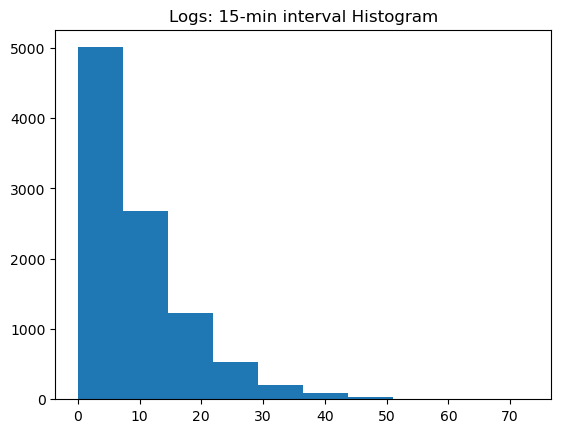

In [8]:
#fig, axs = plt.subplots(1, 2, figsize=(5, 3))
plt.hist(resampled_15min_counts)
plt.title('Logs: 15-min interval Histogram')
plt.show()

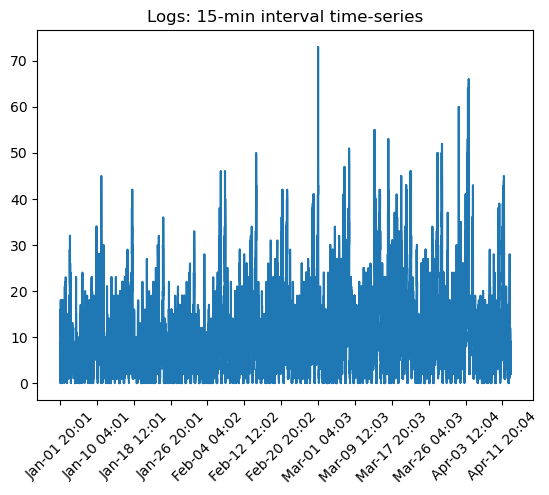

In [9]:
fig, ax = plt.subplots()
ax.plot(resampled_15min_counts)
ax.tick_params(axis='x', labelrotation=45)
ax.xaxis.set_major_locator(MaxNLocator(15))
plt.title('Logs: 15-min interval time-series')
plt.show()

In [10]:
# Resample the logins data frame to every hour increment
resampled_hour_counts = logins_df.set_index('login_time')\
                                  .resample('1h')\
                                  .size()
# Convert series to pandas df
resampled_hour_counts = resampled_hour_counts.to_frame(name='1hour_count')

# Change the date format time Month-day Hour:min
resampled_hour_counts.index = resampled_hour_counts.index.strftime('%b-%d %H:%m')


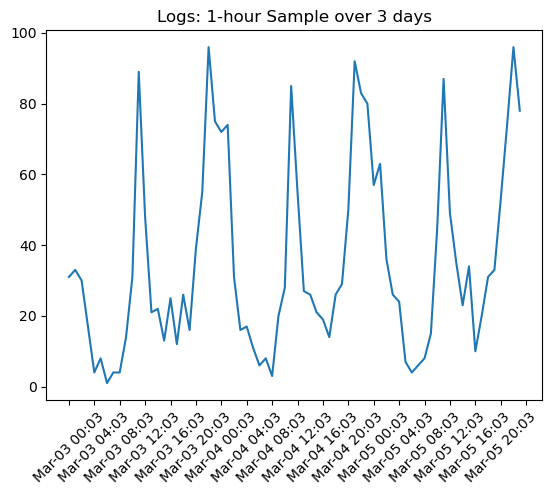

In [11]:
# Filter time segment
start_time = 'Mar-03 00:00'
end_time = 'Mar-06 00:00'
filtered_time = (resampled_hour_counts.index >= start_time) & (resampled_hour_counts.index <= end_time)

fig, ax = plt.subplots()
ax.plot(resampled_hour_counts[filtered_time])
#
# Use maxNlocator to set the number of tick marks
ax.xaxis.set_major_locator(MaxNLocator(20))
ax.tick_params(axis='x', labelrotation=45)
plt.title('Logs: 1-hour Sample over 3 days')
plt.show()

*Describe the result time series of logins counts that best characterizes the underlying patterns.*
<span style="color: blue; font-family: Arial; font-size: 14px; background-color: #EEEEEE">
The login dataset has 93,142 entries from January to April but has a year of 1970. The year logged may be incorrect. Aggregating the logs every 15 minutes shows a average of 9.5 min with a 8.8 min standard deviation. The histogram is sharply left skewed and has a maximum of 73 minutes.
</span>

<span style="color: blue; font-family: Arial; font-size: 14px; background-color: #EEEEEE">
The plot of the entire time series shows daily cycles that increase in magnitude slightly from January to April. Aggregating the logs by hour and plotting a time segement of a few days shows a cycle of peaks in the morning and evening and troughs during midday and night. 
</span>

### Part 2 - Experiment and metrics design



1) What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

<span style="color: blue; font-family: Arial; font-size: 14px; background-color: #EEEEEE">
The metric to choose to determine that driver partners are available in both cities is: number of toll bridge crossing per day. This would allow one to check that driving partners are servicing both cities. 

</span>


2) Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:

a) How would you implement the experiment?

<span style="color: blue; font-family: Arial; font-size: 14px; background-color: #EEEEEE">
The measure to verify the effectiveness of the city's experiment is to compare a time series during a similar time period before any change was inacted and after the city experiment goes into effect. A positive effect would be to look at the change in number of hours. 
</span>

b) What statistical test(s) you will conduct to verify the significance of the observation.

<span style="color: blue; font-family: Arial; font-size: 14px; background-color: #EEEEEE">
In order to verify the significancce of the observation, confidence interval testing would be performed on the sample time series from above before and after the change using a boot strapped method. 
</span>

c) How you would interpret the results and provide recommendations to the city operations team along with any caveats.

<span style="color: blue; font-family: Arial; font-size: 14px; background-color: #EEEEEE">
The prior and the posterior would have different means. The samples of the distributions would allow us to determine a confidence interval (usually 95%) of the difference in the means and the confidence of that. 
</span>

### Part 3 - Predictive model


1) Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?


In [12]:
city_df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [13]:
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [14]:
city_df['city']

0        King's Landing
1               Astapor
2               Astapor
3        King's Landing
4            Winterfell
              ...      
49995    King's Landing
49996           Astapor
49997        Winterfell
49998           Astapor
49999           Astapor
Name: city, Length: 50000, dtype: object

In [15]:
# Number of cities
city_df['city'].nunique()

3

In [16]:
# See missing data
city_df.isna().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

In [17]:
# Order the columns of the dataframe
df = city_df[['city','phone','signup_date','last_trip_date',\
        'avg_dist','avg_rating_by_driver','avg_rating_of_driver',\
        'surge_pct','avg_surge','trips_in_first_30_days',\
        'ultimate_black_user','weekday_pct']]

In [18]:
#city_df['phone'].value_counts().plot(kind='bar')
#plt.show()

In [39]:
# Convert date time 
df['signup_date'] = pd.to_datetime(df['signup_date'],format='%Y-%m-%d')
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'],format='%Y-%m-%d')
# Convert phone to category
df['phone']=df['phone'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   phone                   50000 non-null  category      
 2   signup_date             50000 non-null  datetime64[ns]
 3   last_trip_date          50000 non-null  datetime64[ns]
 4   avg_dist                50000 non-null  float64       
 5   avg_rating_by_driver    50000 non-null  float64       
 6   avg_rating_of_driver    50000 non-null  float64       
 7   surge_pct               50000 non-null  float64       
 8   avg_surge               50000 non-null  float64       
 9   trips_in_first_30_days  50000 non-null  int64         
 10  ultimate_black_user     50000 non-null  bool          
 11  weekday_pct             50000 non-null  float64       
dtypes: bool(1), category(1), datetime64[ns](2), fl

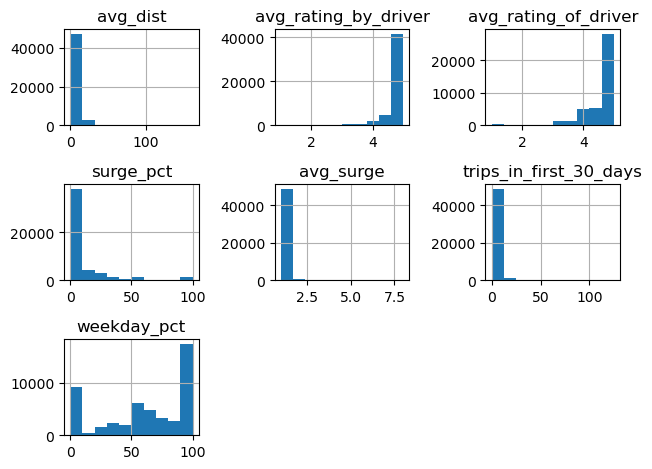

In [20]:
df.hist()
plt.tight_layout()
plt.show()

In [21]:
#height=df.phone.count())
#df.phone.num

In [22]:
# Fill missing driver and user ratings with the average
#help(df.fillna)
df.fillna(value = {'avg_rating_by_driver': df['avg_rating_by_driver'].mean(),\
          'avg_rating_of_driver': df['avg_rating_of_driver'].mean()},\
          inplace=True)
# Fill in missing phone using the forward fill method
df['phone']=df['phone'].ffill()

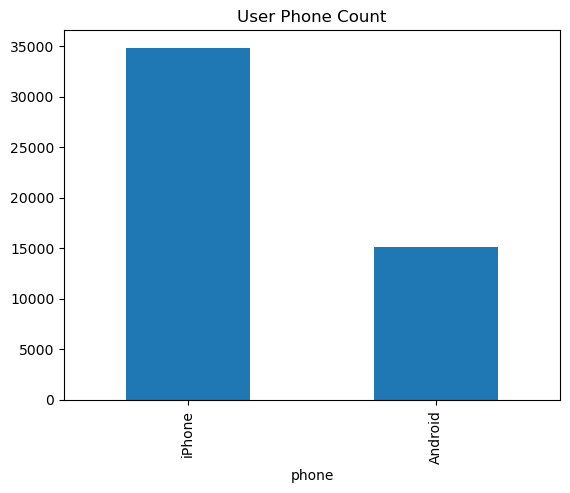

In [40]:
# Plot shows iphones are more popular by over 50%
df.phone.value_counts().plot(kind='bar')
plt.title('User Phone Count')
plt.show()

In [33]:
# Summing the isna series shows that there are no longer any null data in the dataframe
#help(df.fillna)
print(df.isna().sum())

city                      0
phone                     0
signup_date               0
last_trip_date            0
avg_dist                  0
avg_rating_by_driver      0
avg_rating_of_driver      0
surge_pct                 0
avg_surge                 0
trips_in_first_30_days    0
ultimate_black_user       0
weekday_pct               0
dtype: int64


In [43]:
# Difference from signup to last trip
diff = df['last_trip_date']-df['signup_date']
diff_days =  diff.dt.days
diff_pct = 100*diff_days/len(df.last_trip_date)

# The beginning of the time series is Jan 1st, 2014
# The end of the of the time series is July 1st, 2014
# The average time betwen sign-up and last trip is 92 days
# The standard deviation is 62 days


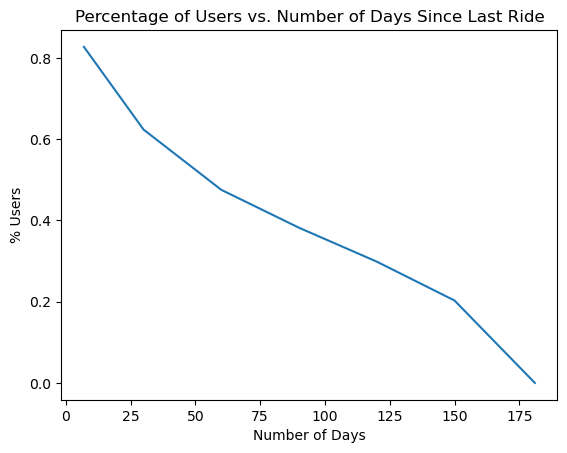

[0.82746, 0.62392, 0.47556, 0.38214, 0.29866, 0.20294, 0.0]


In [85]:
# There is a average of 72 days since the last trip
last_date = pd.to_datetime('2014-07-01')
days_since_last_trip = last_date - df.last_trip_date
days_since_last_trip = days_since_last_trip.dt.days
num_days = [7, 30, 60, 90, 120, 150, 181]
pct_retained = []
for k in num_days:
    pct_retained.append(days_since_last_trip[days_since_last_trip>k].count()/len(days_since_last_trip))

plt.plot(num_days, pct_retained)
plt.title('Percentage of Users vs. Number of Days Since Last Ride')
plt.xlabel('Number of Days')
plt.ylabel('% Users')
plt.show()

print(pct_retained)

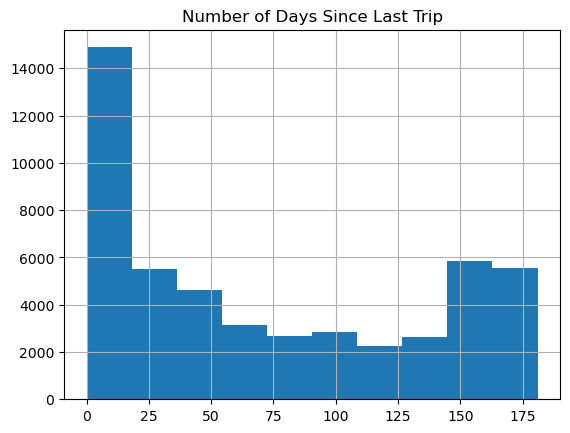

In [80]:
days_since_last_trip.hist(bins=10)
plt.title('Number of Days Since Last Trip')
plt.show()

# The distribution of the number of days since last trip is right skewed. 

What fraction of the observed users were retained?

<span style="color: blue; font-family: Arial; font-size: 14px; background-color: #EEEEEE">
The signup date to the is Jan-01 and the last ride date is Jul-01, a time span of 6 months. The number of riders that have had 5 months since there last ride is approximately 21%. The maximum days since of no rides is 181 days or 6 months. Assuming a cutoff of greater than 5 months since last ride, the retention rate of the riders is approximately 80%.  
</span>

2) Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.


In [159]:
# Assume churn is user activity of >150 days
# Churn is the target variable
df["churn"] = days_since_last_trip>150
diff_date = df.last_trip_date - df.signup_date
df["diff_signup_last_trip"] = diff_date.dt.days



In [161]:
# Drop signup and last trip date
df.drop(columns=['signup_date','last_trip_date'], inplace=True)

In [162]:
df.head()

,city,phone,avg_dist,avg_rating_by_driver,avg_rating_of_driver,surge_pct,avg_surge,trips_in_first_30_days,ultimate_black_user,weekday_pct,churn,diff_signup_last_trip
0,King's Landing,iPhone,3.67,5.0,4.7,15.4,1.10,4,True,46.2,False,143
1,Astapor,Android,8.26,5.0,5.0,0.0,1.00,0,False,50.0,False,96
2,Astapor,iPhone,0.77,5.0,4.3,0.0,1.00,3,False,100.0,True,1
3,King's Landing,iPhone,2.36,4.9,4.6,20.0,1.14,9,True,80.0,False,170
4,Winterfell,Android,3.13,4.9,4.4,11.8,1.19,14,False,82.4,False,47


In [199]:
# Import time
import time
import numpy as np
# Import category encoder
import category_encoders as ce

# Train test split
from sklearn.model_selection import train_test_split

# Models
from sklearn.ensemble import RandomForestClassifier

# metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import r2_score, mean_squared_error

In [166]:
model_target = df['churn']
model_features = df.drop(columns=['churn'],axis=1)

In [186]:
#model_features.head()
#Encode the model's categorical data
encoder = ce.OneHotEncoder(cols=['city','phone'], 
                           use_cat_names=True,
                            return_df=True)
model_feat_enc = encoder.fit_transform(model_features)

In [181]:
#print(model_features.shape[1])
#print(model_feat_enc.shape[1])
#print(model_feat_enc.head())

In [195]:
# Split train, test data

# Define target variable and independent variables
X = model_feat_enc 
y = model_target
# Split dataset 80% train, 20% Test
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,
                                                train_size = 0.80,
                                                random_state = 42)

In [201]:
#
start_time = time.perf_counter()

rf = RandomForestClassifier(n_jobs=-1, random_state=30)
rf.fit(Xtrain, ytrain)
ypred_rf = rf.predict(Xtest)

# Print R^2 for fit
print("RF - Test R²:", np.round(rf.score(Xtest, ytest),3))
# Mean absolute percentage error
print(f"RF mean squared error: {round(mean_squared_error(ytest, ypred_rf),2)}.")
#
end_time = time.perf_counter()
print(f"Elapsed time: {round((end_time - start_time)/60,3)} minutes.")

RF - Test R²: 0.965
RF mean squared error: 0.04.
Elapsed time: 0.011 minutes.


Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.

<span style="color: blue; font-family: Arial; font-size: 14px; background-color: #EEEEEE">
A cutoff of 150 days was chosen for the "churn" target variable as it is over 1 standard deviation from the mean of the average days till last ride metric. With the target variable selected, the categorical features of the dataset were encoded with OHE. The dataset was split with 80% for training and 20% testing dataset. A random forest classifier was chosen since it is generalizable out of the box without the need to tune hyperparameters. Other models could have been used, RF usually produces accurate results without the need for tuning. The model fit of the test data produced a R-squared value of 0.965 with a MSE of 0.04.
</span>

3) Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long term rider retention (again, a few sentences will suffice).

<span style="color: blue; font-family: Arial; font-size: 14px; background-color: #EEEEEE">
With this model, Ultimate can predict which users are at risk of churning and offer them incentives to use the platform. 
</span>